## Equilibrium vs Term-Structure Models


A no arbitrage model is a model designed to be consistent with today`s term structure of interest rates

The difference between equilibrium (endogenous) and non-arbitrage models (exogenous) is that today`s term structure of interest rate is an output in equilibrium models

In a no-arbitrage model, today's term structure of interest rates is an input. This means that we take the observed rates while constructing the model and estimate the unobserbved rates

The HJM framework described a clear path from the equilibrium towards term-structure models

## Some popular equilibrium models. 
# Vasicek model
$$ dr(t) = \lambda (\theta - r(t))dt + \eta dW(t)$$

# COX, Ingersoll and Ross (CIR) model:
$$ dr(t) =\lambda (\theta - r(t))dt + \gamma \sqrt{r_t}  dW(t)$$

These models are one-factor models, which have several shortcomings, e.g. the interest rates are perfectly correlated between different maturities.

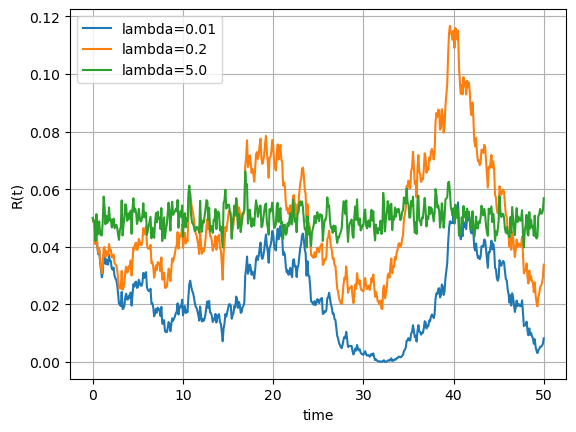

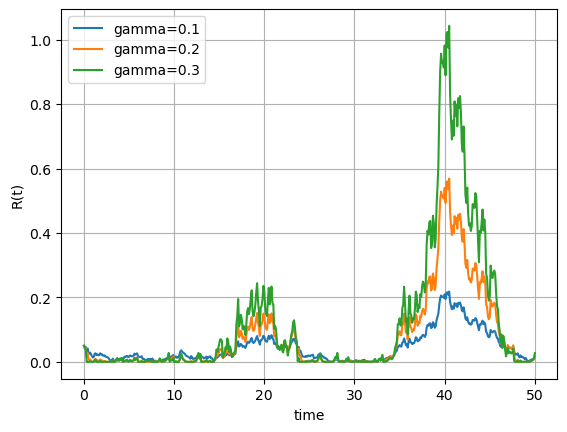

In [2]:
#%%
import numpy as np
import matplotlib.pyplot as plt

def GeneratePathsCIREuler(NoOfPaths,NoOfSteps,T,lambd,r0,theta,gamma):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    R = np.zeros([NoOfPaths, NoOfSteps+1])
    R[:,0]=r0
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        R[:,i+1] = R[:,i] + lambd*(theta - R[:,i]) * dt + gamma* np.sqrt(R[:,i]) * (W[:,i+1]-W[:,i])
        
        # Truncated boundary condition
        R[:,i+1] = np.maximum(R[:,i+1],0.0)
        time[i+1] = time[i] +dt
        
    # Outputs
    paths = {"time":time,"R":R}
    return paths
def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 500
    T         = 50.0
    lambd     = 0.1
    gamma     = 0.05
    r0        = 0.05
    theta     = 0.05
    
    # Effect of mean reversion lambda
    plt.figure(1) 
    legend = []
    lambdVec = [0.01, 0.2, 5.0]
    for lambdTemp in lambdVec:    
        np.random.seed(2)
        Paths = GeneratePathsCIREuler(NoOfPaths,NoOfSteps,T,lambdTemp,r0,theta,gamma)
        legend.append('lambda={0}'.format(lambdTemp))
        timeGrid = Paths["time"]
        R = Paths["R"]
        plt.plot(timeGrid, np.transpose(R))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("R(t)")
    plt.legend(legend)
        
    # Effect of the volatility
    plt.figure(2)    
    legend = []
    gammaVec = [0.1, 0.2, 0.3]
    for gammaTemp in gammaVec:
        np.random.seed(2)
        Paths = GeneratePathsCIREuler(NoOfPaths,NoOfSteps,T,lambd,r0,theta,gammaTemp)
        legend.append('gamma={0}'.format(gammaTemp))
        timeGrid = Paths["time"]
        R = Paths["R"]
        plt.plot(timeGrid, np.transpose(R))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("R(t)")
    plt.legend(legend)
    
mainCalculation()

## The HJM Framework
The Heath-Jarrow_Morton framework represents a class of models that are derived by directly modeling the dynamics of instanteneous forward-rates

The framework constitutes the fundament for interest rate models as it provides an explicit relation between the volatility of the instantenous foraward rates and arbitrage free drift

Both the standard short-rate and Libor Market models can be derived in the HJM framework, however in general.

The HJM models are non-Markovian so only a number of models with a closed form solution exists.

## Instantenous Forward rate
Assuming  no arbitrage and market completeness the following equality must hold:
$$ P(t,T) = P(t,S) P(t,S,T)$$
Now we define the implied forward rate $R(t,S,T)$ at time $t$ for the period $[S,T]$ as:
$$ P(t,S,T) = e^{- (T-S) R(t,S,T)}$$
$$ \frac{ P(t,T)}{P(t,S)} e^{- (T-S) R(t,S,T)}$$
which reads the forward rate $R(t,S,T)$ to be given by:
$$ R(t,S,T) = - \frac{ ln P(t,T) - ln P(t,S)}{T-S}$$
By setting the limit $T-S \rightarrow 0$ we arrive at the definition of the instantenous forward rate
$$ f(t,T) = lim_{S \rightarrow T} R(t,S,T) = - \frac{\partial}{\partial T} log P(t,T)$$

We start with an assumption that for a certain, fixed, maturity $T\geq 0$, the instantenous forward rate $f(t,T)$ under the real-world measure $\mathbb{P}$ is driven by the following dynamics:
$$d f(t,T) = \alpha^{\mathbb{P}}(t,T)dt + \sigma(t,T)dW^{\mathbb{P}}(t)$$
$$f(0,T)=f_0(T)$$
for any time $t<T$ with a corresponding drift $ \alpha^{\mathbb{P}}(t,T)dt$.
Under this model we also define a money-savings account as:
$$M(t) = exp\bigg(\int_0^t r(s)ds\bigg) = exp\bigg(\int_0^t f(s,s)ds\bigg)$$
$$P(t,T) = \mathbb{E} \bigg[e^{ - \int_t^T r(s)ds}\bigg| \mathcal{F}(t)\bigg]


when changing measure from $\mathbb{P}$ to $\mathbb{Q}$ we see the relationship between the parameters of the instantenous forward rate.

If we impose these quantities to be martingales, we can define the risk neutral measure of the instantenous forward rate

the short rate is connected with the instantenous forward rate by just changing the second input.
Whenever we change $T$ we have different parameters, Non-markovian dynamic, there is a dependence between different instantenous rate

## Arbitrage free HJM
the short rate $r(t)$ is defined as the limit of the instantenous forward rate $r(t)= f(t,t)$. The zero coupon bond, P(t,T) with maturity $T$ follows:
$$P(t,T) = M(t) \mathbb{E}^{\mathbb{Q}}\bigg[\frac{1}{M(T)} \cdot 1 \bigg| \mathcal{F}(t)\bigg]$$
$$P(t,T) = \mathbb{E} \bigg[e^{ - \int_t^T r(s)ds}\bigg| \mathcal{F}(t)\bigg]$$

- What are the tradables in this market? and what quantities are the martingales? We make sure that the tradable asset divided by the numeraire is a martingale
- How to find $\alpha^{\mathbb{Q}}(t,T)$ in 
$$d f(t,T) = \alpha^{\mathbb{Q}}(t,T)dt + \sigma(t,T)dW^{\mathbb{Q}}(t)$$
$$f(0,T)=f_0(T)$$

Although the ZCB can be priced as an expectation its value can be directly related to today's yield curve via:
$$f(t,T) = - \frac{\partial}{\partial T} log P(t,T)$$

From above we can easily determine the following relation:
$$P(t,T) = e^{- \int_0^Tf(t,s)ds}$$

The arbitrage condition states that the tradable asset in the economy discounted with the money market account must be a martingale:
$$ d\bigg(\frac{P(t,T)}{M(t)}\bigg) = d\bigg[ exp \bigg( - \int_t^Tf(t,s)ds - \int_0^t r(s)ds\bigg)\bigg] =dZ(t)$$
The no arbitrage drift conditions is given by:
$$ \alpha^{\mathbb{Q}}(t,T) = \sigma(t,T) \int_t^T\sigma(t,s)ds$$


## Short rate dynamics under HJM
By using the relation $f(t,t)=r(t)$ and by integrating the SDEs we obtain the short rate dynamics under the HJM framework of the form:
$$ f(t,T) = f(0,T) + \int_0^t \alpha^{\mathbb{Q}}(s,T)ds + \int_0^t \sigma(s,T)dW^{\mathbb{Q}}(s)$$
which for $T=t$ simply becomes:
$$ r(t) = f(t,t) + \int_0^t \alpha^{\mathbb{Q}}(s,T)ds + \int_0^t \sigma(s,T)dW^{\mathbb{Q}}(s)$$

Now applying the Leibniz integral rule:
$$ \frac{\partial}{dt} \int_{a(t)}^{b(t)} f(x,t)dx = f(b,t) \frac{\partial}{\partial t}b(t) - f(a,t)\frac{\partial}{\partial t} a(t) +  \int_{a(t)}^{b(t)} \frac{\partial}{dt} f(x,t)dx$$

which becomes:
$$ d r(t) = \bigg[ \frac{\partial}{\partial t}f(0,t) + \alpha^{\mathbb{Q}}(t,t) +  \int_0^t \alpha^{\mathbb{Q}}(s,T)ds + \int_0^t  \sigma(s,T)dW^{\mathbb{Q}}(s)\bigg] + \sigma(t,t)dW^{\mathbb{Q}}(t)$$ 

## Ho-Lee Model
We specify a certain form of volatility $\sigma(t,T)$ for the instantenous forward rate $f(t,T)$ and determine the resulting short rate dynamics. The first and simplest possibility is to consider $\sigma(t,T)$ to be constant:
$$\sigma(t,T)=\sigma$$

From previous derivation we find:
$$ \alpha^{\mathbb{Q}}(t,T) = \sigma \int_t^T \sigma ds = \sigma^2(T-t)$$

Therefore the short-rate dynamics under the HJM model with $\sigma(t,T)=\sigma$ is given by:

$$ d r(t) = \bigg( \frac{\partial}{\partial t}f(0,t) + \sigma^2\bigg)dt + \sigma dW^{\mathbb{Q}}(t) $$ 
By setting:

$$\theta(t) = \frac{\partial}{\partial t}f(0,t) + \sigma^2t$$
we arrive at:
$$ d r(t) = \theta (t)dt + \sigma dW^{\mathbb{Q}}(t)$$


which is well-recognized as the Ho-Lee short rate model.
Now we can compute ZCBs $P(t,T)$ using this model:
$$ P(t,T) = \mathbb{E}\bigg[e^{ - \int_t^T r(s)ds}\bigg|\mathcal{F}(t)\bigg] = e^{A(t,T) + B(t,T)r(t)}$$

## Python exercise
- Define $P_{mrkt}(t,T) = exp{-r(T-t)}$ (it can be much more involved or implied from the market), for some r, calculate $f(t,T)$ and use it for simulating $r(t)$
- Consider the Ho-Lee model with a freely chosen parameter $\sigma$
- It is important to properly choose the initial value for the process $r(t)$:
$$ r(0) = f(0,0) \approx - \frac{\partial log P_{mkrt}(0,\epsilon)}{\partial \epsilon}$$
for $\epsilon \rightarrow 0$


Using Monte Carlo Paths calculate:
$$ P_{model}(t,T)=\mathbb{E}^{\mathbb{Q}} \bigg[e^{-\int_t^Tr(s)ds} \bigg| \mathcal{F}(t)\bigg] $$

Whatever parameter chosen for $\sigma$ the yield-curve does not have to change.

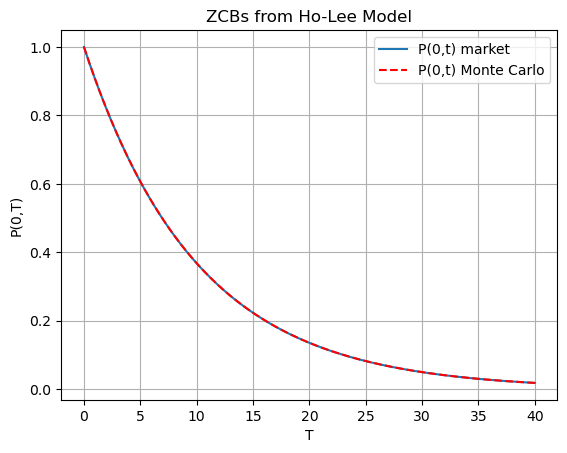

In [3]:
#%%
import numpy as np
import matplotlib.pyplot as plt

def f0T(t,P0T):
    # time-step needed for differentiation
    dt = 0.01    
    expr = - (np.log(P0T(t+dt))-np.log(P0T(t-dt)))/(2*dt)
    return expr

def GeneratePathsHoLeeEuler(NoOfPaths,NoOfSteps,T,P0T,sigma):    
    
    # Initial interest rate is a forward rate at time t->0
    r0 = f0T(0.01,P0T)
    theta = lambda t: (f0T(t+dt,P0T)-f0T(t-dt,P0T))/(2.0*dt) + sigma**2.0*t 
     
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    R = np.zeros([NoOfPaths, NoOfSteps+1])
    M = np.zeros([NoOfPaths, NoOfSteps+1])
    M[:,0]= 1.0
    R[:,0]=r0
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        R[:,i+1] = R[:,i] + theta(time[i]) * dt + sigma* (W[:,i+1]-W[:,i])
        M[:,i+1] = M[:,i] * np.exp((R[:,i+1]+R[:,i])*0.5*dt)
        time[i+1] = time[i] +dt
        
    # Outputs
    paths = {"time":time,"R":R,"M":M}
    return paths

def mainCalculation():
    NoOfPaths = 25000
    NoOfSteps = 500
       
    sigma = 0.007
        
    # We define a ZCB curve (obtained from the market)
    P0T = lambda T: np.exp(-0.1*T)
       
    # In this experiment we compare ZCB from the Market and Monte Carlo
    "Monte Carlo part"   
    T = 40
    paths= GeneratePathsHoLeeEuler(NoOfPaths,NoOfSteps,T,P0T,sigma)
    M = paths["M"]
    ti = paths["time"]
        
    # Here we compare the price of an option on a ZCB from Monte Carlo and Analytical expression    
    P_t = np.zeros([NoOfSteps+1])
    for i in range(0,NoOfSteps+1):
        P_t[i] = np.mean(1.0/M[:,i])
   
    plt.figure(1)
    plt.grid()
    plt.xlabel('T')
    plt.ylabel('P(0,T)')
    plt.plot(ti,P0T(ti))
    plt.plot(ti,P_t,'--r')
    plt.legend(['P(0,t) market','P(0,t) Monte Carlo'])
    plt.title('ZCBs from Ho-Lee Model')
    
mainCalculation()









## Hull-White Model
Let us now consider a short-rate model generated by the HJM volatility given by:
$$ \sigma(t,T) = \sigma \cdot e^{-\lambda(T-t)}, \text{ with } \lambda > 0$$

As before the short-rate dynamics under the HJM arbitrage free assumptions is given by:
$$ d r(t) = \bigg[ \frac{\partial}{\partial t}f(0,t) + \alpha^{\mathbb{Q}}(t,t) +  \int_0^t \alpha^{\mathbb{Q}}(s,T)ds + \int_0^t  \sigma(s,T)dW^{\mathbb{Q}}(s)\bigg] + \sigma(t,t)dW^{\mathbb{Q}}(t)$$ 


By Lemma we find:
$$ \alpha^{\mathbb{Q}}(s,t) = \sigma e^{-\lambda(t-s)}\int_s^t \sigma e^{- \lambda(u-t)}du = - \frac{\sigma^2}{\lambda}e^{-\lambda(t-s)}\bigg(e^{-\lambda(t-s)}-1\bigg)$$
which implies that $\alpha^{\mathbb{Q}}(t,t)=0$

The remaining terms are as follows:
$$\int_0^t \frac{\partial}{\partial t} \alpha^{\mathbb{Q}}(s,t)ds = \frac{\sigma^2}{\lambda} e^{-2\lambda t}(e^{\lambda t}-1)$$

and:
$$  \frac{\partial}{\partial t} \sigma(s,t) = -\lambda \sigma e^{-\lambda (t-s)} = - \lambda \sigma(s,t)$$
with $\sigma(t,t)= \sigma$

The dynamics for r(t) is therefore given by:
$$ d r(t) = \frac{\partial}{\partial t}f(0,t) + \int_0^t \frac{\partial}{\partial t} \alpha^{\mathbb{Q}}(s,t)ds - \lambda \int_0^t \sigma(s,t)dW^{\mathbb{Q}}(s) + \sigma dW^{\mathbb{Q}}(t)$$

In order to find explicitly the solution for the integral $\int_0^t \sigma(s,t) dW^\mathbb{Q}(s)$ we can use the definition of the short rate which yields:
$$ r(t) = f(0,t) + \int_0^t \alpha^{\mathbb{Q}}(s,t)ds + \int_0^t \sigma(s,t)dW^{\mathbb{Q}}(s)$$

Therefore the first integral can be determined by:
$$\int_0^t \sigma(s,t)dW^{\mathbb{Q}}(s) = r(t) -  f(0,t) - \int_0^t \alpha^{\mathbb{Q}}(s,t)ds$$

As:
$$\int_0^t \alpha^{\mathbb{Q}}(s,t)ds = \frac{\sigma^2}{2\lambda^2} e^{-2\lambda t}(e^{\lambda t}-1)^2$$

we obtain the following dynamics for the process r(t):
$$ d r(t) = \lambda \bigg( \frac{1}{\lambda} \frac{\partial}{\partial t} f(0,t) + f(0,t) + \frac{\sigma^2}{2\lambda^2}\bigg(1 - e^{-2\lambda }\bigg) -r(t)\bigg) dt + \sigma dW^{\mathbb{Q}}(t)$$

So finally by taking:
$$ \theta (t) = \frac{1}{\lambda} \frac{\partial}{\partial t}f(0,t) + f(0,t) + \frac{\sigma^2}{2\lambda^2}(1-e^{-2\lambda t})$$

the dynamic of the process r(t) yields:
$$ d r(t) = \lambda(\theta(t) - r(t))dt + \sigma dW^{\mathbb{Q}}(t)$$
It is important to properly choose the initial value for the process r(t):
$$ r(0) = f(0,0) \approx - \frac{\partial ln P(0,\epsilon)}{\partial \epsilon}$$
for $\epsilon \rightarrow 0$

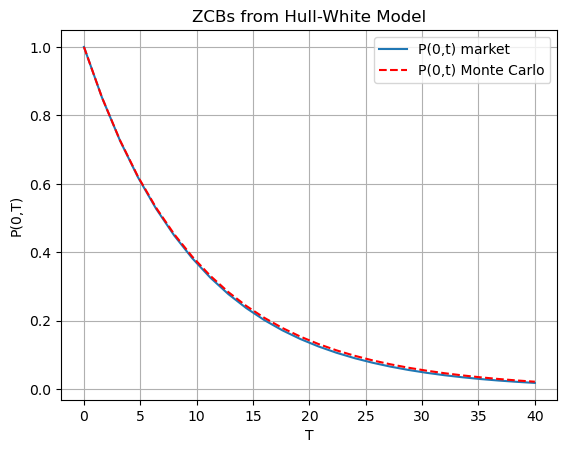

In [4]:
#%%
"""
"""

import numpy as np
import matplotlib.pyplot as plt

def f0T(t,P0T):
    # time-step needed for differentiation
    dt = 0.01    
    expr = - (np.log(P0T(t+dt))-np.log(P0T(t-dt)))/(2*dt)
    return expr

def GeneratePathsHWEuler(NoOfPaths,NoOfSteps,T,P0T, lambd, eta):    
    
    # Initial interest rate is a forward rate at time t->0
    r0 = f0T(0.01,P0T)
    theta = lambda t: 1.0/lambd * (f0T(t+dt,P0T)-f0T(t-dt,P0T))/(2.0*dt) + f0T(t,P0T) + eta*eta/(2.0*lambd*lambd)*(1.0-np.exp(-2.0*lambd*t))      
    
    #theta = lambda t: 0.1 +t -t
    #print("changed theta")
    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    R = np.zeros([NoOfPaths, NoOfSteps+1])
    M = np.zeros([NoOfPaths, NoOfSteps+1])
    M[:,0]= 1.0
    R[:,0]= r0
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        R[:,i+1] = R[:,i] + lambd*(theta(time[i]) - R[:,i]) * dt + eta* (W[:,i+1]-W[:,i])
        M[:,i+1] = M[:,i] * np.exp((R[:,i+1]+R[:,i])*0.5*dt)
        time[i+1] = time[i] +dt
        
    # Outputs
    paths = {"time":time,"R":R,"M":M}
    return paths

def HW_theta(lambd,eta,P0T):
    dt = 0.01    
    theta = lambda t: 1.0/lambd * (f0T(t+dt,P0T)-f0T(t-dt,P0T))/(2.0*dt) + f0T(t,P0T) + eta*eta/(2.0*lambd*lambd)*(1.0-np.exp(-2.0*lambd*t))
    #print("CHANGED THETA")
    return theta#lambda t: 0.1+t-t


def mainCalculation():
    NoOfPaths = 25000
    NoOfSteps = 25
       
    lambd = 0.02
    eta   = 0.02

    # We define a ZCB curve (obtained from the market)
    P0T = lambda T: np.exp(-0.1*T)
       
    # In this experiment we compare ZCB from the Market and Monte Carlo
    "Monte Carlo part"   
    T = 40
    paths= GeneratePathsHWEuler(NoOfPaths,NoOfSteps,T,P0T, lambd, eta)
    M = paths["M"]
    ti = paths["time"]
    #dt = timeGrid[1]-timeGrid[0]
    
    # Here we compare the price of an option on a ZCB from Monte Carlo the Market  
    P_tMC = np.zeros([NoOfSteps+1])
    for i in range(0,NoOfSteps+1):
        P_tMC[i] = np.mean(1.0/M[:,i])
  

    plt.figure(1)
    plt.grid()
    plt.xlabel('T')
    plt.ylabel('P(0,T)')
    plt.plot(ti,P0T(ti))
    plt.plot(ti,P_tMC,'--r')
    plt.legend(['P(0,t) market','P(0,t) Monte Carlo'])
    plt.title('ZCBs from Hull-White Model')
    
mainCalculation()